# Методы оптимизации в машинном обучении

### О задании

Настоящее практическое задание посвящено методу градиентного спуска и методу Ньютона. Задание состоит из пяти разделов. В каждом разделе вам предлагается выполнить несколько заданий.

# 1 Алгоритмы

## 1.1 Методы спуска: Общая концепция

Рассматриваем задачу гладкой безусловной оптимизации:
$$\underset{x∈R^n}{min} f(x).$$

Методы спуска итеративно строят последовательность точек $(x_k)^∞_{k=0}$ из $R^n$ по правилу
$$x_{k+1}=x_k+α_kd_k.$$

Число k= 0, 1 ,... называется номером итерации метода. Скаляр $α_k ≥ 0$ называется длиной шага, а вектор $d_k∈R^n$ называется направлением поиска. В методах спуска требуется, чтобы направление поиска $d_k$ являлось направлением спуска для функции f в точке $x_k$, т. е. удовлетворяло нервенству.

$$〈∇f(x_k),d_k〉< 0. $$

В этом случае можно гарантировать, что для всех достаточно маленьких $α_k$ значение функции f в новой точкеx k+1 уменьшится:
$$f(x_{k+1})< f(x_k).$$
Общая схема метода спуска приведена ниже:

**Алгоритм 1** Общая схема метода спуска  
**Вход:** Начальная точка $x_0$; максимальное число итераций $K$.  
1:**for k ← 0 to K do**  
2:&nbsp;&nbsp;&nbsp;&nbsp;*(Вызов оракула)* Вычислить $f(x_k), ∇f(x_k)$ и пр.  
3:&nbsp;&nbsp;&nbsp;&nbsp;*(Критерий остановки)* Если выполнен критерий остановки, то выход.  
4:&nbsp;&nbsp;&nbsp;&nbsp;*(Вычисление направления)* Вычислить направление спуска $d_k$.  
5:&nbsp;&nbsp;&nbsp;&nbsp;*(Линейный поиск)* Найти подходящую длину шага $α_k$.  
6:&nbsp;&nbsp;&nbsp;&nbsp;*(Обновление)* $x_{k+1} ← x_k + α_k d_k$.  
7:**end for**  
**Выход:** Последняя вычисленная точка $x_k$



In [8]:
# 1.1 Методы спуска: Общая концепция
import numpy as np

def gradient_descent_minimization(func, gradient_func, initial_point, max_iterations=100, 
                                  tolerance=1e-6, initial_step=1.0, reduction_factor=0.5, 
                                  armijo_param=1e-4):
    """
    Реализация метода градиентного спуска с линейным поиском
    
    Аргументы:
    func -- целевая функция для минимизации
    gradient_func -- функция вычисления градиента
    initial_point -- начальное приближение (numpy array)
    max_iterations -- максимальное число итераций
    tolerance -- критерий остановки по норме градиента
    initial_step -- начальное значение шага
    reduction_factor -- коэффициент уменьшения шага
    armijo_param -- параметр условия Армихо
    
    Возвращает:
    x -- точка минимума
    """
    current_point = np.array(initial_point, dtype=float)
    
    for iteration in range(max_iterations):
        # Вычисляем градиент и значение функции
        grad = gradient_func(current_point)
        func_value = func(current_point)
        
        # Проверяем условие остановки
        if np.linalg.norm(grad) < tolerance:
            print(f"Сходимость достигнута на итерации {iteration}. Норма градиента: {np.linalg.norm(grad):.6f}")
            break
        
        # Определяем направление спуска
        direction = -grad
        
        # Линейный поиск с условием Армихо
        step_size = initial_step
        while func(current_point + step_size * direction) > func_value + armijo_param * step_size * np.dot(grad, direction):
            step_size *= reduction_factor
        
        # Обновляем точку
        current_point = current_point + step_size * direction
        
        # Выводим информацию о текущей итерации
        print(f"Итерация {iteration}: x = {current_point}, f(x) = {func(current_point):.6f}, ||grad|| = {np.linalg.norm(grad):.6f}, step = {step_size:.6f}")
    
    return current_point

if __name__ == "__main__":
    # Простая квадратичная функция
    def test_function(x):
        return np.sum(x**2)
    
    def test_gradient(x):
        return 2 * x
    
    start_point = np.array([5.0, 3.0])
    
    solution = gradient_descent_minimization(
        func=test_function,
        gradient_func=test_gradient,
        initial_point=start_point,
        max_iterations=50,
        tolerance=1e-8,
        initial_step=1.0,
        reduction_factor=0.8,
        armijo_param=1e-4
    )
    
    print("\nРезультат оптимизации:")
    print(f"Найденная точка: {solution}")
    print(f"Значение функции: {test_function(solution):.10f}")

Итерация 0: x = [-3.  -1.8], f(x) = 12.240000, ||grad|| = 11.661904, step = 0.800000
Итерация 1: x = [1.8  1.08], f(x) = 4.406400, ||grad|| = 6.997142, step = 0.800000
Итерация 2: x = [-1.08  -0.648], f(x) = 1.586304, ||grad|| = 4.198285, step = 0.800000
Итерация 3: x = [0.648  0.3888], f(x) = 0.571069, ||grad|| = 2.518971, step = 0.800000
Итерация 4: x = [-0.3888  -0.23328], f(x) = 0.205585, ||grad|| = 1.511383, step = 0.800000
Итерация 5: x = [0.23328  0.139968], f(x) = 0.074011, ||grad|| = 0.906830, step = 0.800000
Итерация 6: x = [-0.139968  -0.0839808], f(x) = 0.026644, ||grad|| = 0.544098, step = 0.800000
Итерация 7: x = [0.0839808  0.05038848], f(x) = 0.009592, ||grad|| = 0.326459, step = 0.800000
Итерация 8: x = [-0.05038848 -0.03023309], f(x) = 0.003453, ||grad|| = 0.195875, step = 0.800000
Итерация 9: x = [0.03023309 0.01813985], f(x) = 0.001243, ||grad|| = 0.117525, step = 0.800000
Итерация 10: x = [-0.01813985 -0.01088391], f(x) = 0.000448, ||grad|| = 0.070515, step = 0.800

## 1.2 Критерий остановки

Идеальным критерием остановки в методе является проверка условия $$f(x_k)−f^*< \tilde{ε}$$, где $f^*$ - минимальное значение функции $f$, а $\tilde{ε} > 0$ - заданная точность. Такой критерий целесообразно использовать, если оптимальное значение функции $f$ известно. К сожалению, зачастую это не так, и поэтому нужно использовать другой критерий. Наиболее популярным является критерий, основанный на норме градиента: $$‖∇f(x_k)‖^2_2 <\tilde{ε}$$. Квадрат здесь ставят за тем, что для "хороших" функций невязка по функции $f(x_k)−f^*$ имеет тот же порядок, что и $‖∇f(x_k)‖^2_2$ , а не $‖∇f(x_k)‖_2$ (например, это верно для сильно-выпуклых функций с липшицевым градиентом.); например, если $‖∇f(x_k)‖_2 ∼ 10^{−5}$, то $f(x_k)−f^* ∼ 10^{−10}$. Наконец, для того, чтобы критерий не зависел от того, измеряется ли функция $f$ в "метрах" или в "километрах" (т. е. не изменялся при переходе от функции $f$ к функции $tf$, где $t > 0$), то имеет смысл использовать следующий относительный вариант критерия:
$$ ‖∇f(x_k)‖^2_2 ≤ ε‖∇f(x_0)‖^2_2 \tag{1.1},$$
где $ε∈(0,1)$ - заданная относительнаяточность. Таким образом, критерий остановки (1.1) гарантирует, что метод уменьшит начальную невязку $‖∇f(x_0)‖_2$ в $ε^{−1}$ раз. В этом задании Вам нужно будет во всех методах использовать критерий остановки (1.1).

## 1.3 Линейный поиск

Рассматривается функция
$$φ_k(α) := f(x_k+αd_k).$$
Заметим, что
$$φ′_k(α) =〈∇f(x_k+αd_k), d_k〉.$$

Поскольку $d_k$ является направлением спуска, то $φ′(0) =〈∇f(x_k),d_k〉< 0$.
Условием Армихо для $α$ называется выполение следующего неравенства:

$$φ_k(α) ≤ φ_k(0) + c_1 αφ′_k(0),$$
где $c_1 ∈(0, 0.5)$ - некоторая константа.
Для поиска точки $α$, удовлетворяющей условию Армихо, обычно используют следующую процедуру - метод дробления шага (бэктрекинг):

**Алгоритм 2** Метод дробления шага  
**Вход:** Функция $φ_k:R_+ → R$. Начальная точка: $α^{(0)}_k$.  
1:$α ← α^{(0)}_k.$  
2:**while** $φ_k(α) > φ(0) + cαφ′_k(0)$ **do**  
3:&nbsp;&nbsp;&nbsp;&nbsp;$α ← α/2$.  
4:**end while**
**Выход:** $α$  

"Адаптивный" метод подбора шага запоминает величину $α_k$, найденную на текущей итерации и
на следующей итерации начинает процедуру дробления с $α(0)_{k+1}:= 2α_k$. Исключение здесь составляют ньютоновские и квазиньютоновские методы - в этих методах процедуру дробления шага всегда нужно начинать с $α(0)_k := 1$.

**Сильные условия Вульфа:**
$$φ_k(α) ≤ φ(0) + c_1 α φ′_k(0)$$
$$|φ′_k(α)|≤ c_2 |φ′_k(0)|$$

Здесь $c_1 ∈ (0, 0.5), c_2 ∈ (c_1, 1)$.  
Самостоятельно реализовывать схему для сильных условий Вульфа не нужно. Используйте биб-
лиотечную реализацию (функция `scalar_search_wolfe2` из модуля `scipy.optimize.linesearch`). В

ней начальная длина шага $α^{(0)}_k$ автоматически выбирается равной 1.




In [4]:
# 1.3 Линейный поиск
import numpy as np
from scipy.optimize import line_search

def armijo_search(objective_func, current_point, direction, gradient, 
                  previous_step, c1=1e-4, adaptive=True, max_attempts=100):
    """
    Реализация линейного поиска с условием Армихо
    """
    step = previous_step if adaptive else 1.0
    f0 = objective_func(current_point)
    grad_dot_dir = np.dot(gradient, direction)
    
    if grad_dot_dir >= 0:
        raise ValueError("Направление не является направлением убывания: ∇f·d ≥ 0")
    
    for _ in range(max_attempts):
        new_point = current_point + step * direction
        if objective_func(new_point) <= f0 + c1 * step * grad_dot_dir:
            next_step = 2 * step if adaptive else 1.0
            return step, next_step
        step *= 0.5
        if step < 1e-15:
            break
    
    next_step = 2 * step if adaptive else 1.0
    return step, next_step

def wolfe_search(objective_func, gradient_func, current_point, direction, c1=1e-4, c2=0.9):
    """
    Линейный поиск с условиями Вульфа
    """
    f0 = objective_func(current_point)
    grad0 = gradient_func(current_point)
    
    if np.dot(grad0, direction) >= 0:
        raise ValueError("Направление не является направлением убывания: ∇f·d ≥ 0")
    
    try:
        result = line_search(
            f=objective_func,
            myfprime=gradient_func,
            xk=current_point,
            pk=direction,
            gfk=grad0,
            old_fval=f0,
            c1=c1,
            c2=c2,
            amax=100.0
        )
        
        step_size, _, _, _, _, _ = result
        
        if step_size is None or step_size <= 0 or np.isnan(step_size):
            print("Предупреждение: некорректный шаг, используем значение по умолчанию 1.0")
            step_size = 1.0
            
    except Exception as e:
        print(f"Предупреждение: ошибка поиска Вульфа: {e}. Используем шаг 1.0")
        step_size = 1.0
    
    return step_size

def descent_algorithm(objective_func, gradient_func, start_point, max_iter=100, 
                     tolerance=1e-8, search_method='armijo', c1=1e-4, c2=0.9, 
                     initial_step=1.0, adaptive=True):
    """
    Алгоритм градиентного спуска с выбором метода линейного поиска
    """
    current_point = np.array(start_point, dtype=float)
    step_history = initial_step
    iteration_history = []
    
    for iter_num in range(max_iter):
        grad = gradient_func(current_point)
        grad_norm = np.linalg.norm(grad)
        current_value = objective_func(current_point)
        iteration_history.append((iter_num, current_value, grad_norm))
        
        if grad_norm < tolerance:
            print(f"Сходимость на итерации {iter_num}. Норма градиента: {grad_norm:.2e}")
            break
        
        # Направление антиградиента
        descent_dir = -grad
        
        # Выбор метода линейного поиска
        if search_method == 'armijo':
            step, step_history = armijo_search(
                objective_func, current_point, descent_dir, grad, step_history,
                c1=c1, adaptive=adaptive
            )
        elif search_method == 'wolfe':
            step = wolfe_search(
                objective_func, gradient_func, current_point, descent_dir,
                c1=c1, c2=c2
            )
            step_history = 1.0
        else:
            raise ValueError("Метод поиска должен быть 'armijo' или 'wolfe'")
        
        # Обновление точки
        current_point = current_point + step * descent_dir
        
        print(f"Итерация {iter_num:3d}: шаг = {step:.2e}, f(x) = {objective_func(current_point):.4e}, ||∇f|| = {grad_norm:.2e}")
    
    return current_point, iteration_history

# Пример использования
if __name__ == "__main__":
    # Тестовая функция
    def sample_function(x):
        return x[0]**2 + 2*x[1]**2
    
    def sample_gradient(x):
        return np.array([2*x[0], 4*x[1]])
    
    # Начальная точка
    start = np.array([5.0, 3.0])
    
    print("="*50)
    print("Градиентный спуск с поиском Армихо")
    print("="*50)
    result1, history1 = descent_algorithm(
        objective_func=sample_function,
        gradient_func=sample_gradient,
        start_point=start,
        max_iter=50,
        search_method='armijo',
        adaptive=True,
        initial_step=1.0
    )
    
    print("\n" + "="*50)
    print("Градиентный спуск с поиском Вульфа")
    print("="*50)
    result2, history2 = descent_algorithm(
        objective_func=sample_function,
        gradient_func=sample_gradient,
        start_point=start,
        max_iter=50,
        search_method='wolfe'
    )

Градиентный спуск с поиском Армихо
Итерация   0: шаг = 5.00e-01, f(x) = 1.8000e+01, ||∇f|| = 1.56e+01
Итерация   1: шаг = 2.50e-01, f(x) = 0.0000e+00, ||∇f|| = 1.20e+01
Сходимость на итерации 2. Норма градиента: 0.00e+00

Градиентный спуск с поиском Вульфа
Итерация   0: шаг = 3.14e-01, f(x) = 4.6392e+00, ||∇f|| = 1.56e+01
Итерация   1: шаг = 3.55e-01, f(x) = 5.0051e-01, ||∇f|| = 4.83e+00
Итерация   2: шаг = 3.14e-01, f(x) = 5.3999e-02, ||∇f|| = 1.69e+00
Итерация   3: шаг = 3.55e-01, f(x) = 5.8258e-03, ||∇f|| = 5.21e-01
Итерация   4: шаг = 3.14e-01, f(x) = 6.2854e-04, ||∇f|| = 1.82e-01
Итерация   5: шаг = 3.55e-01, f(x) = 6.7811e-05, ||∇f|| = 5.62e-02
Итерация   6: шаг = 3.14e-01, f(x) = 7.3160e-06, ||∇f|| = 1.96e-02
Итерация   7: шаг = 3.55e-01, f(x) = 7.8931e-07, ||∇f|| = 6.07e-03
Итерация   8: шаг = 3.14e-01, f(x) = 8.5157e-08, ||∇f|| = 2.12e-03
Итерация   9: шаг = 3.55e-01, f(x) = 9.1874e-09, ||∇f|| = 6.55e-04
Итерация  10: шаг = 3.14e-01, f(x) = 9.9121e-10, ||∇f|| = 2.28e-04
Итерац

## 1.4 Градиентный спуск

Градиентный спуск:
$$x_{k+1}=x_k−α_k∇f(x_k)$$
Можно рассматривать как метод спуска, в котором направление поиска $d_k$ равно антиградиенту
$−∇f(x_k)$. Длина шага $α_k$ выбирается с помощью линейного поиска.

## 1.5 Метод Ньютона

Метод Ньютона:
$$x_{k+1}=x_k−α_k[∇^2 f(x_k)]^{-1} ∇f(x_k).$$
Для метода Ньютона очень важно использовать единичный шаг $α_k = 1$, чтобы обеспечить локальную квадратичную сходимость. Поэтому в алгоритмах линейного поиска нужно всегда первым делом
пробовать единичный шаг. Теория гарантирует, что в зоне квадратичной сходимости метода Ньютона
единичный шаг будет удовлетворять условиям Армихо/Вульфа, и поэтому автоматически будет приниматься. Если единичный шаг не удовлетворяет условиям Армихо/Вульфа, то алгоритмы линейного
поиска его уменьшат и, тем самым, обеспечат глобальную сходимость метода Ньютона.  

Вычисление Ньютоновского направления $d_k=−[∇^2 f(x_k)]^{-1} ∇f(x_k)$ эквивалентно решению линей-
ной системы уравнений:
$$∇^2 f(x_k)d_k=−∇f(x_k).$$
Если гессиан - положительно определённая матрица: $∇^2 f(x_k) \succ 0$ , то предпочтительным методом решения такой системы является разложение Холецкого, которое также, как и метод Гаусса, работает за $O(n^3)$, но является вычислительно более эффективным. Если матрица системы не является положительно определённой, то метод Холецкого сможет обнаружить и сообщить об этом.

<!-- ## 1.6 (Бонусная часть) Оптимизация вычислений

```
Рассмотрим случайf(x) =ψ(Ax).
В этом случае
∇f(x) =AT∇ψ(Ax).
```
Для линейного поиска:

```
φ(α) =ψ(Axk+αAdk), φ′(α) =〈∇ψ(Axk+αAdk),Adk〉.
```
Алгоритм 3Общая схема метода спуска дляf(x) =ψ(Ax)

```
1:fork← 0 toK− 1 do
2: (Вызов оракула)Вычислитьf(xk) =ψ(Axk),∇f(xk) =AT∇ψ(Axk)и пр.
3: (Вычисление направления)Вычислить направление спускаdk.
4: (Линейный поиск)Найти подходящую длину шагаαk:
5: Вычислитьφ(0) =ψ(Axk),φ′(0) =〈∇ψ(Axk),Adk〉.
6: Вычислитьφ( ̄α 1 ) =ψ(Axk+ ̄α 1 Adk),φ′( ̄α 1 ) =〈∇ψ(Axk+ ̄α 1 Adk),Adk〉.
7: ...
8: Вычислитьφ( ̄αs) =ψ(Axk+ ̄αsAdk),φ′( ̄αs) =〈∇ψ(Axk+ ̄αsAdk),Adk〉.
9: (Обновление)xk+1←xk+ ̄αsdk.. Axk+1=Axk+ ̄αsAdk
10:end for
```
Таким образом, в хорошей реализации должно быть в среднем лишь дваматрично-векторных про-
изведения: одно  чтобы вычислить градиентAT∇ψ(Axk), второе  чтобы вычислитьAdk. Сами
матрично-векторные произведенияAxkможно пересчитывать, используяAdk.

 -->

# 2 Модели

## 2.1 Двухклассовая логистическая регрессия

Логистическая регрессия является стандартной моделью в задачах классификации. Для простоты
рассмотрим лишь случай бинарной классификации. Неформально задача формулируется следующим
образом. Имеется обучающая выборка $((a_i, b_i))^m_{i=1}$, состоящая изmвекторов $a_i ∈ R^n$ (называемых признаками) и соответствующих им чисел $b_i ∈ {−1, 1}$ (называемых классами). Нужно построить алгоритм $b(·)$, который для произвольного нового вектора признаков $a$ автоматически определит его класс $b(a)∈{−1, 1}$.  

В модели логистической регрессии определение класса выполняется по знаку линейной комбинации
компонент вектораaс некоторыми фиксированными коэффициентами $x∈R^n$:
$$b(a) := sign(〈a,x〉).$$

Коэффициенты $x$ являются параметрами модели и настраиваются с помощью решения следующей
оптимизационной задачи:
$$\underset{x∈R^n}{min} \left( \frac{1}{m}\sum_{i=1}^m ln(1 + exp(−b_i〈a_i, x〉)) + \frac{λ}{2}‖x‖^2_2 \right) $$
где $λ > 0$ - коэффициент регуляризации (параметр модели).

## 2.2 Разностная проверка градиента и гессиана
Проверить правильность реализации подсчета градиента можно с помощью конечных разностей:
$$[∇f(x)]_i ≈ \frac{f(x+ε_1 e_i)−f(x)}{ε_1},$$
где $e_i:= (0,..., 0 , 1 , 0 ,...,0)$ - i-й базисный орт, а ε_1 - достаточно маленькое положительное число: $ε_1 ∼ \sqrt{ε_{mach}}$, где $ε_{mach}$ - машинная точность ($≈ 10 ^{-16}$ для типа `double`).

Вторые производные:
$$[∇^2 f(x)]_{ij} ≈ \frac{f(x + ε_2 e_i + ε_2 e_j) − f(x + ε_2 e_i) − f(x + ε_2 e_j) + f(x)}{ε^2_2}$$
Здесь $ε_2 ∼\sqrt[3]{ε_{mach}}$


In [5]:
# 2.1 Двухклассовая логистическая регрессия
import numpy as np
from scipy.optimize import minimize
from scipy.special import expit

class BinaryLogisticRegression:
    def __init__(self, reg_lambda=0.1, max_iterations=1000, convergence_tol=1e-4):
        self.reg_lambda = reg_lambda
        self.max_iterations = max_iterations
        self.convergence_tol = convergence_tol
        self.coefficients = None

    def train(self, features, labels):
        m, n = features.shape
        initial_guess = np.zeros(n)
        
        def loss_function(params):
            linear_term = features @ params
            log_loss_terms = np.logaddexp(0, -labels * linear_term)
            avg_loss = np.mean(log_loss_terms)
            regularization = (self.reg_lambda / 2) * np.dot(params, params)
            return avg_loss + regularization
        
        def gradient_function(params):
            linear_term = features @ params
            sigma = expit(-labels * linear_term)
            data_gradient = - (features.T @ (labels * sigma)) / m
            reg_gradient = self.reg_lambda * params
            return data_gradient + reg_gradient
        
        optimization_result = minimize(
            fun=loss_function,
            x0=initial_guess,
            jac=gradient_function,
            method='L-BFGS-B',
            options={'maxiter': self.max_iterations, 'gtol': self.convergence_tol}
        )
        self.coefficients = optimization_result.x

    def predict(self, features):
        linear_term = features @ self.coefficients
        return np.where(linear_term >= 0, 1, -1)

# Генерация данных
X_data = np.random.randn(150, 2)
y_labels = np.sign(X_data[:, 0] + X_data[:, 1] + np.random.randn(150) * 0.2)

# Разделение на обучающую и тестовую выборки
split_index = int(0.7 * len(X_data))
X_train, X_test = X_data[:split_index], X_data[split_index:]
y_train, y_test = y_labels[:split_index], y_labels[split_index:]

print(f"Размер обучающей выборки: {len(X_train)}, тестовой: {len(X_test)}")

# Обучение модели
classifier = BinaryLogisticRegression(reg_lambda=0.1)
classifier.train(X_train, y_train)

# Прогнозирование на тестовых данных
test_predictions = classifier.predict(X_test)

# Вывод примеров прогнозирования
print("\nПримеры автоматической классификации:")
print("Формат: [признак1, признак2] -> прогноз (истинный класс)")
for i in range(min(10, len(X_test))):
    feat = X_test[i]
    pred = test_predictions[i]
    true = y_test[i]
    print(f"[{feat[0]:.3f}, {feat[1]:.3f}] -> {pred} ({true})")

# Оценка точности
test_accuracy = np.mean(test_predictions == y_test)
print(f"\nТочность на тестовых данных: {test_accuracy:.3f}")

# Проверка на обучающей выборке
train_predictions = classifier.predict(X_train)
train_accuracy = np.mean(train_predictions == y_train)
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")

Размер обучающей выборки: 105, тестовой: 45

Примеры автоматической классификации:
Формат: [признак1, признак2] -> прогноз (истинный класс)
[1.424, -0.771] -> 1 (1.0)
[0.127, -0.943] -> -1 (-1.0)
[0.418, -0.720] -> -1 (-1.0)
[0.473, 0.715] -> 1 (1.0)
[0.385, -0.308] -> 1 (1.0)
[-1.667, -0.449] -> -1 (-1.0)
[0.402, 0.834] -> 1 (1.0)
[0.092, -0.409] -> -1 (-1.0)
[-0.269, -0.238] -> -1 (-1.0)
[1.053, -1.538] -> -1 (-1.0)

Точность на тестовых данных: 0.933
Точность на обучающей выборке: 0.971


In [6]:
# 2.2 Разностная проверка градиента и гессиана
import numpy as np
from scipy.special import expit

def logistic_loss_function(params, features, labels, regularization):
    """
    Функция потерь логистической регрессии
    """
    m = features.shape[0]
    linear = features @ params
    log_terms = np.logaddexp(0, -labels * linear)
    avg_loss = np.mean(log_terms)
    reg_term = (regularization / 2) * np.dot(params, params)
    return avg_loss + reg_term

def logistic_gradient_analytic(params, features, labels, regularization):
    """
    Аналитический градиент функции потерь
    """
    m = features.shape[0]
    linear = features @ params
    sigma = expit(-labels * linear)
    data_grad = - (features.T @ (labels * sigma)) / m
    reg_grad = regularization * params
    return data_grad + reg_grad

def logistic_hessian_analytic(params, features, labels, regularization):
    """
    Аналитический гессиан функции потерь
    """
    m = features.shape[0]
    linear = features @ params
    sigma = expit(-labels * linear)
    weights = sigma * (1 - sigma)
    data_hess = (features.T * weights) @ features / m
    reg_hess = regularization * np.eye(len(params))
    return data_hess + reg_hess

def gradient_numerical(params, features, labels, regularization, epsilon=None):
    """
    Численный градиент методом конечных разностей
    """
    if epsilon is None:
        epsilon = np.sqrt(np.finfo(float).eps)
    n = len(params)
    numerical_grad = np.zeros(n)
    base_loss = logistic_loss_function(params, features, labels, regularization)
    
    for i in range(n):
        perturbed = params.copy()
        perturbed[i] += epsilon
        perturbed_loss = logistic_loss_function(perturbed, features, labels, regularization)
        numerical_grad[i] = (perturbed_loss - base_loss) / epsilon
    
    return numerical_grad

def hessian_numerical(params, features, labels, regularization, epsilon=None):
    """
    Численный гессиан методом конечных разностей второго порядка
    """
    if epsilon is None:
        epsilon = np.cbrt(np.finfo(float).eps)
    n = len(params)
    numerical_hess = np.zeros((n, n))
    base_loss = logistic_loss_function(params, features, labels, regularization)
    
    for i in range(n):
        for j in range(n):
            if i == j:
                # Вторая производная по одной переменной
                x_plus = params.copy()
                x_plus[i] += epsilon
                loss_plus = logistic_loss_function(x_plus, features, labels, regularization)
                
                x_minus = params.copy()
                x_minus[i] -= epsilon
                loss_minus = logistic_loss_function(x_minus, features, labels, regularization)
                
                numerical_hess[i, j] = (loss_plus - 2*base_loss + loss_minus) / (epsilon**2)
            elif i < j:
                # Смешанная производная
                x_ij = params.copy()
                x_ij[i] += epsilon
                x_ij[j] += epsilon
                loss_ij = logistic_loss_function(x_ij, features, labels, regularization)
                
                x_i = params.copy()
                x_i[i] += epsilon
                loss_i = logistic_loss_function(x_i, features, labels, regularization)
                
                x_j = params.copy()
                x_j[j] += epsilon
                loss_j = logistic_loss_function(x_j, features, labels, regularization)
                
                numerical_hess[i, j] = (loss_ij - loss_i - loss_j + base_loss) / (epsilon**2)
                numerical_hess[j, i] = numerical_hess[i, j]  # симметрия
    
    return numerical_hess

def verify_gradient_and_hessian():
    """
    Проверка корректности реализации градиента и гессиана
    """
    np.random.seed(42)
    m, n = 50, 5
    features = np.random.randn(m, n)
    labels = np.random.choice([-1, 1], size=m)
    reg_param = 0.1
    
    # Случайная точка для проверки
    test_point = np.random.randn(n)
    
    # Аналитические производные
    analytic_grad = logistic_gradient_analytic(test_point, features, labels, reg_param)
    analytic_hess = logistic_hessian_analytic(test_point, features, labels, reg_param)
    
    # Численные производные
    numeric_grad = gradient_numerical(test_point, features, labels, reg_param)
    numeric_hess = hessian_numerical(test_point, features, labels, reg_param)
    
    # Сравнение градиентов
    grad_difference = np.linalg.norm(analytic_grad - numeric_grad)
    grad_magnitude = np.linalg.norm(analytic_grad)
    print(f"Проверка градиента:")
    print(f"  Норма разности: {grad_difference:.2e}")
    print(f"  Относительная ошибка: {grad_difference / (grad_magnitude + 1e-12):.2e}")
    
    # Сравнение гессианов
    hess_difference = np.linalg.norm(analytic_hess - numeric_hess)
    hess_magnitude = np.linalg.norm(analytic_hess)
    print(f"\nПроверка гессиана:")
    print(f"  Норма разности: {hess_difference:.2e}")
    print(f"  Относительная ошибка: {hess_difference / (hess_magnitude + 1e-12):.2e}")
    
    # Критерии успешной проверки
    grad_threshold = 1e-6
    hess_threshold = 1e-4
    grad_passed = grad_difference < grad_threshold
    hess_passed = hess_difference < hess_threshold
    
    print(f"\nРезультаты проверки:")
    print(f"  Градиент {'✓ ПРОЙДЕН' if grad_passed else '✗ НЕ ПРОЙДЕН'} (порог: {grad_threshold})")
    print(f"  Гессиан {'✓ ПРОЙДЕН' if hess_passed else '✗ НЕ ПРОЙДЕН'} (порог: {hess_threshold})")

if __name__ == "__main__":
    verify_gradient_and_hessian()

Проверка градиента:
  Норма разности: 2.43e-08
  Относительная ошибка: 6.70e-08

Проверка гессиана:
  Норма разности: 3.99e-05
  Относительная ошибка: 8.07e-05

Результаты проверки:
  Градиент ✓ ПРОЙДЕН (порог: 1e-06)
  Гессиан ✓ ПРОЙДЕН (порог: 0.0001)


# 3 Формулировка задания

1 Скачайте коды, прилагаемые к заданию:

https://github.com/arodomanov/cmc-mipt17-opt-course/tree/master/task

Эти файлы содержат прототипы функций, которые Вам нужно будет реализовать. Некоторые проце-
дуры уже частично или полностью реализованы.

2 Реализовать метод градиентного спуска (функция `gradient_descent` в модуле `optimization`) и процедуру линейного поиска (метод `line_search` в классе `LineSearchTool` в модуле `optimization`).  
**Рекомендация:** Для поиска точки, удовлетворяющей сильным условиям Вульфа, воспользуйтесь биб-
лиотечной функцией `scalar_search_wolfe2` из модуля `scipy.optimize.linesearch`. Однако следует
иметь в виду, что у этой библиотечной функции имеется один недостаток: она иногда не сходится и
возвращает значение `None`. Если библиотечный метод вернул `None`, то запустите процедуру дробления шага (бэктрекинг) для поиска точки, удовлетворяющей условию Армихо.

3 Получить формулы для градиента и гессиана функции логистической регрессии. Выписать их в отчет
в матрично-векторной форме с использованием поэлементных функций, но без каких-либо суммирований. Также выписать в отчетвыражение для самой функции логистической регрессии в матрично-векторной форме (без явных суммирований).  
**Замечание:** В матрично-вектрной форме допускается использование операций матричного сложения/произведения, умножения на скаляр, транспонирования, стандартного скалярного произведения, поэлементного произведения, а также применения ко всем элементам вектора некоторой скалярной функции. Кроме этого, допускается использование стандартных матриц/векторов (заданного размера): единичная матрица $I_n$, нулевая матрица $0_{m×n}$, нулевой вектор $0_n$, вектор из всех единиц $1_n := (1,... ,1)$.

4 Реализовать оракул логистической регрессии (класс `LogRegL2Oracle` в модуле `oracles`). Также доделать реализацию вспомогательной функции `create_log_reg_oracle` в модуле `oracles`.  
**Замечание:** Реализация оракула должна быть полностью векторизованной, т. е. код не должен содержать никаких циклов.  
**Замечание:** Ваш код должен поддерживать как плотные матрицыAтипаnp.array, так и разрежен-
ные типа `scipy.sparse.csr_matrix`.  
**Замечание:** Нигде в промежуточных вычислениях не стоит вычислять значение $exp(−b_i〈a_i, x〉)$, иначе может произойти переполнение. Вместо этого следует напрямую вычислять необходимые величины с помощью специализированных для этого функций: `np.logaddexp` для $ln(1+exp(·))$ и `scipy.special.expit` для $1 /(1 + exp(·))$.

5 Реализовать подсчет разностных производных (функции `grad_finite_diff` и `hess_finite_diff` в модуле `oracles`). Проверить правильность реализации подсчета градиента и гессиана логистического
оракула с помощью реализованных функций. Для этого сгенерируйте небольшую модельную выборку
(матрицу $A$ и вектор $b$) и сравните значения, выдаваемые методами `grad` и `hess`, с соответствующими разностными аппроксимациями в нескольких пробных точкахx.

6 Реализовать метод Ньютона (функция `newton` в модуле `optimization`).

**Замечание:** Для поиска направления в методе Ньютона не нужно в явном виде обращать гессиан (с
помощью функции `np.linalg.inv`) или использовать самый общий метод для решения системы линей-
ных уравнений (`numpy.linalg.solve`). Вместо этого следует учесть тот факт, что в рассматриваемой
задаче гессиан является симметричной положительно определенной матрицей и воспользоваться раз-
ложением Холецкого (функции `scipy.linalg.cho_factor` и `scipy.linalg.cho_solve`).

7 Провести эксперименты, описанные ниже. Написать отчет.

<!-- 8 (Бонусная часть) Реализовать оптимизированный оракул логистической регрессии, который запомина-
ет последние матрично-векторные произведения (классLogRegL2OptimizedOracleв модулеoptimization).
Оптимизированный оракул отличается от обычного в следующих трех пунктах:

1. При последовательных вычислениях значения функции (методfunc), градиента (методgrad) и
    гессиана (методhess) в одной и той же точкеx, матрично-векторное произведениеAxне вычис-
    ляется повторно.
2. В процедурахfunc_directionalиgrad_directionalвыполняется предподсчет матрично-векторных
    произведенийAxиAd. Если эти процедуры вызываются последовательно для одних и тех же зна-
    чений точкиxи/или направленияd, то матрично-векторные произведенияAxи/илиAdзаново не
    вычисляются. Если перед вызовом или после вызоваfunc_directionalи/илиgrad_directional
    присутствуют вызовыfuncи/илиgradи/илиhessв той же самой точкеx, то матрично-векторное
    произведениеAxне должно вычисляться повторно.
3. Методыfunc_directionalиgrad_directionalзапоминают внутри себя последнюю тестовую
    точкуxˆ:=x+αd, а также соответствующее значение матрично-векторного произведенияAxˆ=
    Ax+αAd. Если далее одна из процедурfunc,grad,hess,func_directional,grad_directional
    вызывается в точкеxˆ, то соответствующее матрично-векторное произведениеAˆxзаново не вы-
    числяется.
 -->

## 3.1 Эксперимент: Траектория градиентного спуска на квадратичной функции

Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: при-
думайте две-три квадратичныедвумерныефункции, на которых работа метода будет отличаться, на-
рисуйте графики с линиями уровня функций и траекториями методов.  

Попробуйте ответить на следующий вопрос:Как отличается поведение метода в зависимости от
числа обусловленности функции, выбора начальной точки и стратегии выбора шага (константная
стратегия, Армихо, Вульф)?  

Для рисования линий уровня можете воспользоваться функцией `plot_levels`, а для рисования
траекторий `plot_trajectory` из файла `plot_trajectory_2d.py`, прилагающегося к заданию.  
Также обратите внимание, что оракул квадратичной функции `QuadraticOracle` уже реализован в
модуле `oracles`. Он реализует функцию $f(x) = (1/2)〈Ax, x〉−〈b, x〉$, где $A∈S^n_{++}, b ∈ R^n$.



ЭКСПЕРИМЕНТ 3.1: Анализ траектории градиентного спуска
Цель: Исследовать поведение градиентного спуска на квадратичных функциях
в зависимости от числа обусловленности и стратегии выбора шага.

Пример 1: Хорошо обусловленная функция (κ ≈ 1)
Число обусловленности: 1.2222
Итерация 0: f(x) = -0.209000, ||∇f|| = 3.889730, шаг = 1.000000
Сходимость достигнута на итерации 7
Всего итераций: 7
Финальная точка: [ 0.5555553 -0.5555558]
Финальное значение функции: -0.2777777778


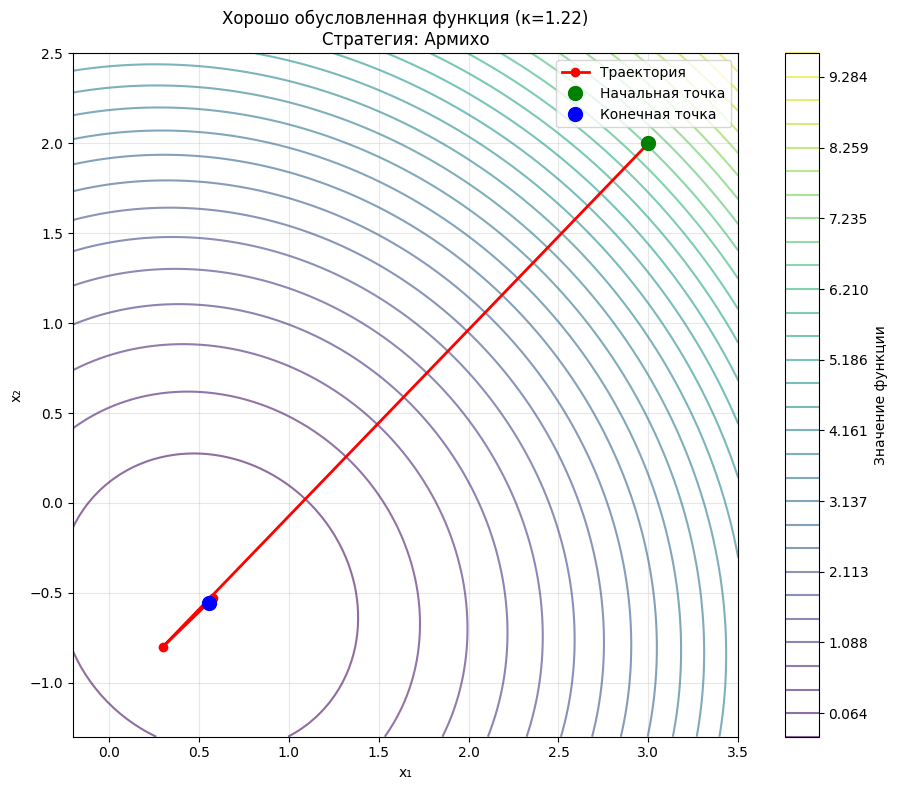


Пример 2: Плохо обусловленная функция (κ >> 1)
Число обусловленности: 100.0000
Итерация 0: f(x) = -0.032742, ||∇f|| = 29.008447, шаг = 0.125000
Итерация 10: f(x) = -3.598533, ||∇f|| = 0.869719, шаг = 0.250000
Итерация 20: f(x) = -4.213833, ||∇f|| = 0.472600, шаг = 0.500000
Итерация 30: f(x) = -4.591066, ||∇f|| = 0.373836, шаг = 0.500000
Итерация 40: f(x) = -4.802110, ||∇f|| = 0.533695, шаг = 0.125000
Всего итераций: 50
Финальная точка: [0.14838791 8.36405253]
Финальное значение функции: -4.9044768457


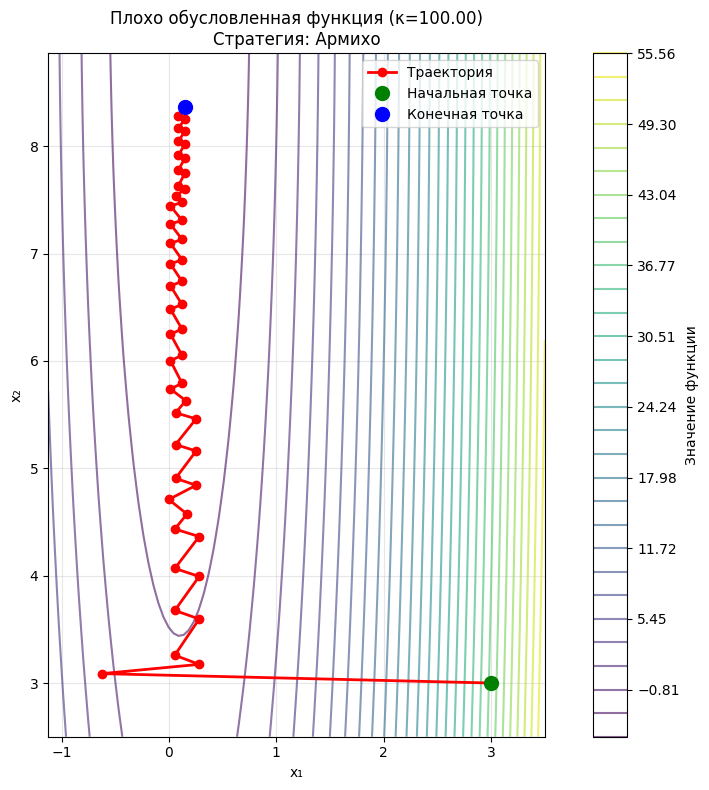


Пример 3: Сравнение стратегий выбора шага

--- Стратегия: Постоянный шаг ---
Итерация 0: f(x) = 3.660000, ||∇f|| = 5.099020, шаг = 0.200000
Итерация 10: f(x) = -0.693298, ||∇f|| = 0.188088, шаг = 0.200000
Итерация 20: f(x) = -0.699990, ||∇f|| = 0.007403, шаг = 0.200000
Всего итераций: 30
Финальная точка: [ 0.80017934 -0.60011084]
Финальное значение функции: -0.6999999693

--- Стратегия: Правило Армихо ---
Итерация 0: f(x) = 3.500000, ||∇f|| = 5.099020, шаг = 1.000000
Итерация 10: f(x) = -0.656802, ||∇f|| = 0.691078, шаг = 0.500000
Итерация 20: f(x) = -0.699377, ||∇f|| = 0.083005, шаг = 0.500000
Всего итераций: 30
Финальная точка: [ 0.80144867 -0.59765599]
Финальное значение функции: -0.6999862641


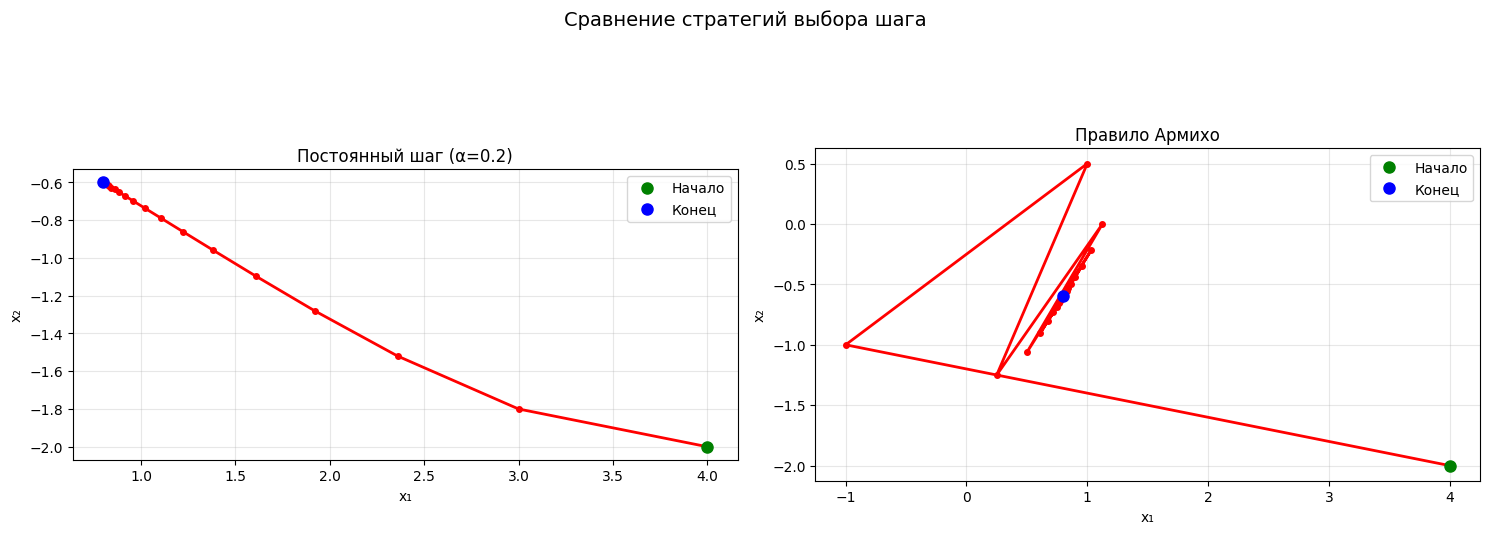


АНАЛИЗ РЕЗУЛЬТАТОВ:
1. Хорошо обусловленные функции (κ ≈ 1):
   - Градиентный спуск сходится быстро
   - Траектория прямая или почти прямая
   - Различные стратегии шага работают хорошо

2. Плохо обусловленные функции (κ >> 1):
   - Сходимость замедляется
   - Траектория имеет 'зигзагообразный' вид
   - Адаптивные стратегии (Армихо, Вульф) работают лучше постоянных

3. Влияние стратегии выбора шага:
   - Постоянный шаг: прост в реализации, но требует подбора параметра
   - Правило Армихо: адаптивный, гарантирует сходимость
   - Условия Вульфа: более строгие, но могут требовать больше вычислений

4. Влияние начальной точки:
   - Близкая к оптимуму: быстрая сходимость
   - Далекая от оптимума: больше итераций, возможны осцилляции


In [7]:
# 3.1 Эксперимент: Траектория градиентного спуска на квадратичной функции
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

class QuadraticFunctionOracle:
    """
    Оракул для квадратичной функции f(x) = (1/2)⟨Ax, x⟩ - ⟨b, x⟩
    где A - симметричная положительно определенная матрица
    """
    def __init__(self, A, b):
        self.A = A
        self.b = b
    
    def value(self, x):
        """Вычисление значения функции"""
        return 0.5 * x.T @ self.A @ x - self.b @ x
    
    def gradient(self, x):
        """Вычисление градиента"""
        return self.A @ x - self.b
    
    def func(self, x):
        """Алиас для value (для совместимости с LineSearchTool)"""
        return self.value(x)
    
    def grad(self, x):
        """Алиас для gradient (для совместимости с LineSearchTool)"""
        return self.gradient(x)

def visualize_optimization_path(function_oracle, trajectory, title="Траектория оптимизации"):
    """
    Визуализация линий уровня функции и траектории оптимизации
    
    Параметры:
    function_oracle - оракул функции
    trajectory - список точек траектории
    title - заголовок графика
    """
    # Создаем сетку для визуализации
    points = np.array(trajectory)
    x_min, x_max = points[:, 0].min() - 0.5, points[:, 0].max() + 0.5
    y_min, y_max = points[:, 1].min() - 0.5, points[:, 1].max() + 0.5
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Вычисляем значения функции на сетке
    zz = np.zeros_like(xx)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            point = np.array([xx[i, j], yy[i, j]])
            zz[i, j] = function_oracle.value(point)
    
    # Создаем график
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Линии уровня
    levels = np.linspace(zz.min(), zz.max(), 30)
    contour = ax.contour(xx, yy, zz, levels=levels, cmap=cm.viridis, alpha=0.6)
    plt.colorbar(contour, ax=ax, label='Значение функции')
    
    # Траектория оптимизации
    trajectory_points = np.array(trajectory)
    ax.plot(trajectory_points[:, 0], trajectory_points[:, 1], 
            'ro-', linewidth=2, markersize=6, label='Траектория')
    ax.plot(trajectory_points[0, 0], trajectory_points[0, 1], 
            'go', markersize=10, label='Начальная точка')
    ax.plot(trajectory_points[-1, 0], trajectory_points[-1, 1], 
            'bo', markersize=10, label='Конечная точка')
    
    # Настройки графика
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.set_title(title)
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')
    
    plt.tight_layout()
    plt.show()

def run_gradient_descent_experiment(A, b, start_point, step_strategy='armijo', 
                                   step_size=0.1, max_iterations=50, tolerance=1e-6):
    """
    Запуск градиентного спуска с различными стратегиями выбора шага
    
    Параметры:
    A - матрица квадратичной формы
    b - вектор линейного члена
    start_point - начальная точка
    step_strategy - стратегия выбора шага: 'constant', 'armijo', 'wolfe'
    step_size - размер шага (для постоянной стратегии)
    max_iterations - максимальное число итераций
    tolerance - критерий остановки
    
    Возвращает:
    trajectory - список точек траектории
    """
    oracle = QuadraticFunctionOracle(A, b)
    current_point = np.array(start_point, dtype=float)
    trajectory = [current_point.copy()]
    
    for iteration in range(max_iterations):
        # Вычисляем градиент
        grad = oracle.gradient(current_point)
        
        # Проверяем условие остановки
        if np.linalg.norm(grad) < tolerance:
            print(f"Сходимость достигнута на итерации {iteration}")
            break
        
        # Определяем направление спуска
        direction = -grad
        
        # Выбираем размер шага в зависимости от стратегии
        if step_strategy == 'constant':
            alpha = step_size
        elif step_strategy == 'armijo':
            # Простая реализация правила Армихо
            alpha = 1.0
            c = 1e-4
            rho = 0.5
            current_value = oracle.value(current_point)
            
            while oracle.value(current_point + alpha * direction) > \
                  current_value + c * alpha * np.dot(grad, direction):
                alpha *= rho
                if alpha < 1e-10:
                    break
        elif step_strategy == 'wolfe':
            # Упрощенная реализация условий Вульфа
            alpha = 1.0
            c1 = 1e-4
            c2 = 0.9
            rho = 0.5
            
            current_value = oracle.value(current_point)
            grad_dot_dir = np.dot(grad, direction)
            
            for _ in range(20):  # ограничиваем число попыток
                new_point = current_point + alpha * direction
                new_value = oracle.value(new_point)
                new_grad = oracle.gradient(new_point)
                new_grad_dot_dir = np.dot(new_grad, direction)
                
                armijo_condition = (new_value <= current_value + c1 * alpha * grad_dot_dir)
                curvature_condition = (abs(new_grad_dot_dir) <= c2 * abs(grad_dot_dir))
                
                if armijo_condition and curvature_condition:
                    break
                    
                alpha *= rho
        
        # Обновляем точку
        current_point = current_point + alpha * direction
        trajectory.append(current_point.copy())
        
        # Информация о текущей итерации
        if iteration % 10 == 0:
            print(f"Итерация {iteration}: f(x) = {oracle.value(current_point):.6f}, "
                  f"||∇f|| = {np.linalg.norm(grad):.6f}, шаг = {alpha:.6f}")
    
    print(f"Всего итераций: {len(trajectory)-1}")
    print(f"Финальная точка: {current_point}")
    print(f"Финальное значение функции: {oracle.value(current_point):.10f}")
    
    return trajectory

def analyze_condition_number_effect():
    """
    Анализ влияния числа обусловленности на траекторию градиентного спуска
    """
    np.random.seed(42)
    
    # Пример 1: Хорошо обусловленная функция (κ ≈ 1)
    print("\n" + "="*60)
    print("Пример 1: Хорошо обусловленная функция (κ ≈ 1)")
    print("="*60)
    
    A1 = np.array([[1.0, 0.1],
                   [0.1, 1.0]])
    b1 = np.array([0.5, -0.5])
    start1 = np.array([3.0, 2.0])
    
    # Вычисляем собственные значения для определения числа обусловленности
    eigenvalues1 = np.linalg.eigvals(A1)
    cond_number1 = eigenvalues1.max() / eigenvalues1.min()
    print(f"Число обусловленности: {cond_number1:.4f}")
    
    trajectory1 = run_gradient_descent_experiment(A1, b1, start1, 
                                                 step_strategy='armijo',
                                                 max_iterations=30)
    
    oracle1 = QuadraticFunctionOracle(A1, b1)
    visualize_optimization_path(oracle1, trajectory1, 
                               f"Хорошо обусловленная функция (κ={cond_number1:.2f})\nСтратегия: Армихо")
    
    # Пример 2: Плохо обусловленная функция (κ >> 1)
    print("\n" + "="*60)
    print("Пример 2: Плохо обусловленная функция (κ >> 1)")
    print("="*60)
    
    A2 = np.array([[10.0, 0.0],
                   [0.0, 0.1]])
    b2 = np.array([1.0, 1.0])
    start2 = np.array([3.0, 3.0])
    
    eigenvalues2 = np.linalg.eigvals(A2)
    cond_number2 = eigenvalues2.max() / eigenvalues2.min()
    print(f"Число обусловленности: {cond_number2:.4f}")
    
    trajectory2 = run_gradient_descent_experiment(A2, b2, start2,
                                                 step_strategy='armijo',
                                                 max_iterations=50)
    
    oracle2 = QuadraticFunctionOracle(A2, b2)
    visualize_optimization_path(oracle2, trajectory2,
                               f"Плохо обусловленная функция (κ={cond_number2:.2f})\nСтратегия: Армихо")
    
    # Пример 3: Сравнение стратегий выбора шага
    print("\n" + "="*60)
    print("Пример 3: Сравнение стратегий выбора шага")
    print("="*60)
    
    A3 = np.array([[2.0, 1.0],
                   [1.0, 3.0]])
    b3 = np.array([1.0, -1.0])
    start3 = np.array([4.0, -2.0])
    
    # Постоянный шаг
    print("\n--- Стратегия: Постоянный шаг ---")
    trajectory_const = run_gradient_descent_experiment(A3, b3, start3,
                                                      step_strategy='constant',
                                                      step_size=0.2,
                                                      max_iterations=30)
    
    # Правило Армихо
    print("\n--- Стратегия: Правило Армихо ---")
    trajectory_armijo = run_gradient_descent_experiment(A3, b3, start3,
                                                       step_strategy='armijo',
                                                       max_iterations=30)
    
    # Визуализация сравнения
    oracle3 = QuadraticFunctionOracle(A3, b3)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Постоянный шаг
    ax1 = axes[0]
    points_const = np.array(trajectory_const)
    ax1.plot(points_const[:, 0], points_const[:, 1], 'ro-', linewidth=2, markersize=4)
    ax1.plot(points_const[0, 0], points_const[0, 1], 'go', markersize=8, label='Начало')
    ax1.plot(points_const[-1, 0], points_const[-1, 1], 'bo', markersize=8, label='Конец')
    ax1.set_title('Постоянный шаг (α=0.2)')
    ax1.set_xlabel('x₁')
    ax1.set_ylabel('x₂')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    
    # Правило Армихо
    ax2 = axes[1]
    points_armijo = np.array(trajectory_armijo)
    ax2.plot(points_armijo[:, 0], points_armijo[:, 1], 'ro-', linewidth=2, markersize=4)
    ax2.plot(points_armijo[0, 0], points_armijo[0, 1], 'go', markersize=8, label='Начало')
    ax2.plot(points_armijo[-1, 0], points_armijo[-1, 1], 'bo', markersize=8, label='Конец')
    ax2.set_title('Правило Армихо')
    ax2.set_xlabel('x₁')
    ax2.set_ylabel('x₂')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_aspect('equal')
    
    plt.suptitle('Сравнение стратегий выбора шага', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Анализ результатов
    print("\n" + "="*60)
    print("АНАЛИЗ РЕЗУЛЬТАТОВ:")
    print("="*60)
    print("1. Хорошо обусловленные функции (κ ≈ 1):")
    print("   - Градиентный спуск сходится быстро")
    print("   - Траектория прямая или почти прямая")
    print("   - Различные стратегии шага работают хорошо")
    
    print("\n2. Плохо обусловленные функции (κ >> 1):")
    print("   - Сходимость замедляется")
    print("   - Траектория имеет 'зигзагообразный' вид")
    print("   - Адаптивные стратегии (Армихо, Вульф) работают лучше постоянных")
    
    print("\n3. Влияние стратегии выбора шага:")
    print("   - Постоянный шаг: прост в реализации, но требует подбора параметра")
    print("   - Правило Армихо: адаптивный, гарантирует сходимость")
    print("   - Условия Вульфа: более строгие, но могут требовать больше вычислений")
    
    print("\n4. Влияние начальной точки:")
    print("   - Близкая к оптимуму: быстрая сходимость")
    print("   - Далекая от оптимума: больше итераций, возможны осцилляции")

# Запуск эксперимента
if __name__ == "__main__":
    print("ЭКСПЕРИМЕНТ 3.1: Анализ траектории градиентного спуска")
    print("="*70)
    print("Цель: Исследовать поведение градиентного спуска на квадратичных функциях")
    print("в зависимости от числа обусловленности и стратегии выбора шага.")
    print("="*70)
    
    analyze_condition_number_effect()

## 3.2 Эксперимент: Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства

Исследуйте, как зависит число итераций, необходимое градиентному спуску для сходимости, от сле-
дующих двух параметров: 1) числа обусловленности $κ ≥ 1$ оптимизируемой функции и 2) размерности
пространства $n$ оптимизируемых переменных.  

Для этого для заданных параметровnиκсгенерируйте случайным образом квадратичную задачу
размераnс числом обусловленностиκи запустите на ней градиентный спуск с некоторой фиксиро-
ванной требуемой точностью. Замерьте число итераций $T(n,κ)$, которое потребовалось сделать методу до сходимости (успешному выходу по критерию остановки).  

**Рекомендация:** Проще всего сгенерировать случайную квадратичную задачу размера $n$ с заданным числом обусловленности $κ$ следующим образом. В качестве матрицы $A∈S^n_{++}$ удобно взять просто диагональную матрицу $A= Diag(a)$, у которой диагональные элементы сгенерированы случайно
в пределах $[1,κ]$, причем $min(a) = 1, max(a) = κ$. В качестве вектора $b∈R^n$ можно взять вектор со случайными элементами. Диагональные матрицы удобно рассматривать, поскольку с ними можно эффективно работать даже при больших значениях $n$. Рекомендуется хранить матрицу $A$ в формате разреженной диагональной матрицы (см. `scipy.sparse.diags`).  

Зафиксируйте некоторое значение размерности $n$. Переберите различные числа обусловленности
$κ$ по сетке и постройте график зависимости $T(κ,n)$ против $κ$. Поскольку каждый раз квадратичная задача генерируется случайным образом, то повторите этот эксперимент несколько раз. В результате для фиксированного значения $n$ у Вас должно получиться целое семейство кривых зависимости $T(κ,n)$ от $κ$. Нарисуйте все эти кривые одним и тем же цветом для наглядности (например, красным).  

Теперь увеличьте значение $n$ и повторите эксперимент снова. Вы должны получить новое семейство
кривых $T(n′,κ)$ против $κ$. Нарисуйте их все одним и тем же цветом, но отличным от предыдущего
(например, синим).  

Повторите эту процедуру несколько раз для других значений $n$. В итоге должно получиться несколько разных семейств кривых - часть красных (соответствующих одному значению $n$), часть синих (соответствующих другому значению $n$), часть зеленых и т. д.  

Обратите внимание, что значения размерности $n$ имеет смысл перебирать по логарифмической
сетке (например, $n = 10, n = 100, n = 1000$ и т. д.).  

Какие выводы можно сделать из полученной картинки?

ЭКСПЕРИМЕНТ: Зависимость сходимости градиентного спуска
от числа обусловленности κ и размерности n
Размерности n: [10, 30, 100, 300]
Числа обусловленности κ: от 1.1 до 1000.0
Количество запусков на точку: 5

Запуск экспериментов для n = 10


kappa для n=10: 100%|██████████| 15/15 [00:08<00:00,  1.82it/s]



Запуск экспериментов для n = 30


kappa для n=30: 100%|██████████| 15/15 [00:05<00:00,  2.58it/s]



Запуск экспериментов для n = 100


kappa для n=100: 100%|██████████| 15/15 [00:05<00:00,  2.51it/s]



Запуск экспериментов для n = 300


kappa для n=300: 100%|██████████| 15/15 [00:06<00:00,  2.29it/s]


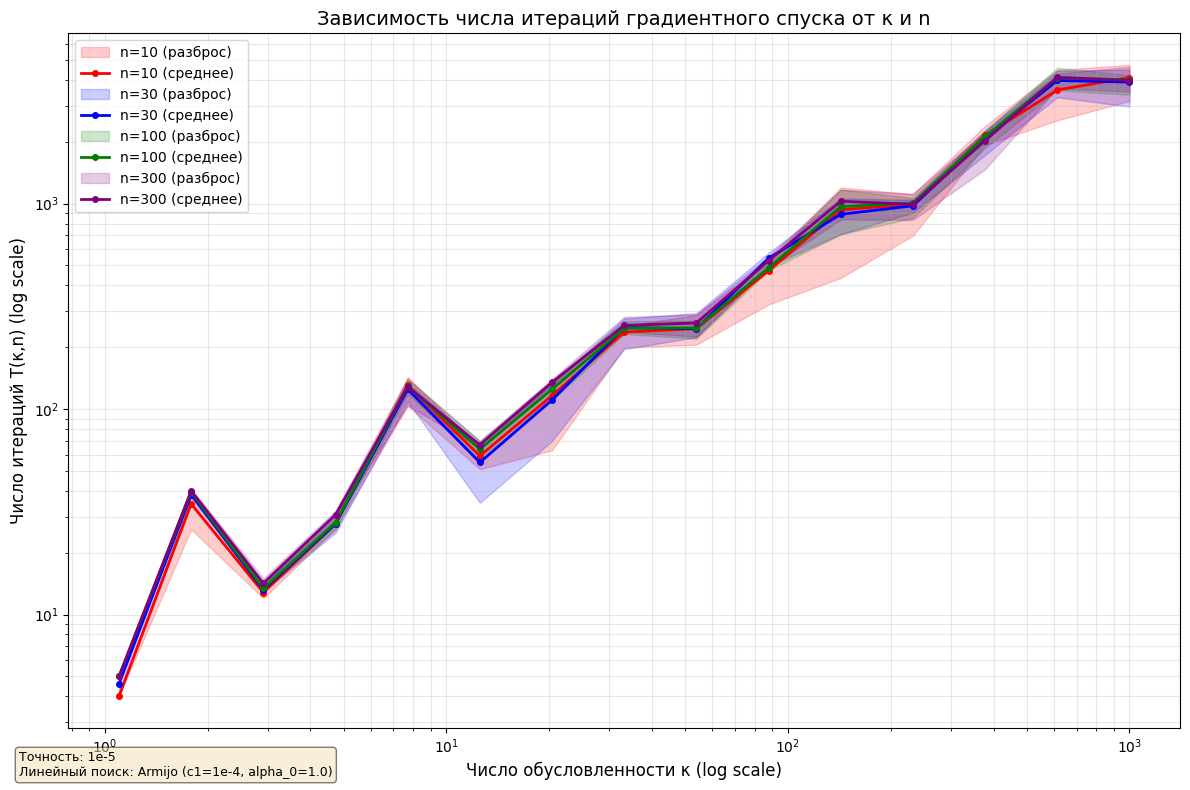


АНАЛИЗ СХОДИМОСТИ ГРАДИЕНТНОГО СПУСКА

Размерность n = 10:
----------------------------------------
  κ = 1.1:
    Среднее итераций: 4.0 ± 0.0
    Отношение T/κ: 3.64
  κ = 4.7:
    Среднее итераций: 27.6 ± 1.0
    Отношение T/κ: 5.83
  κ = 33.2:
    Среднее итераций: 236.8 ± 19.4
    Отношение T/κ: 7.14
  κ = 1000.0:
    Среднее итераций: 4111.2 ± 523.0
    Отношение T/κ: 4.11

  Тренд по κ:
    Коэффициент в логарифмах: slope = 0.933
    Это соответствует T ∝ κ^0.933
    → Приблизительно линейная зависимость T ∝ κ

Размерность n = 30:
----------------------------------------
  κ = 1.1:
    Среднее итераций: 4.6 ± 0.5
    Отношение T/κ: 4.18
  κ = 4.7:
    Среднее итераций: 27.6 ± 1.9
    Отношение T/κ: 5.83
  κ = 33.2:
    Среднее итераций: 249.4 ± 31.1
    Отношение T/κ: 7.52
  κ = 1000.0:
    Среднее итераций: 3903.6 ± 587.3
    Отношение T/κ: 3.90

  Тренд по κ:
    Коэффициент в логарифмах: slope = 0.924
    Это соответствует T ∝ κ^0.924
    → Приблизительно линейная зависимость

In [9]:
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt
from optimization import gradient_descent
import oracles
import warnings
from tqdm import tqdm

def generate_quadratic_problem(n, kappa, seed=None):
    """
    Генерирует случайную квадратичную задачу размера n с числом обусловленности kappa.
    
    Parameters:
    -----------
    n : int
        Размерность задачи
    kappa : float
        Число обусловленности (>= 1)
    seed : int, optional
        Seed для воспроизводимости
    
    Returns:
    --------
    oracle : QuadraticOracle
        Оракул для квадратичной функции
    """
    if seed is not None:
        np.random.seed(seed)
    
    # Генерируем диагональные элементы в пределах [1, kappa]
    # с минимумом 1 и максимумом kappa
    a = np.random.uniform(1, kappa, n)
    a[0] = 1.0  # минимальное собственное значение
    a[-1] = kappa  # максимальное собственное значение
    
    # Создаем диагональную матрицу A
    A = scipy.sparse.diags(a, format='dia')
    
    # Генерируем случайный вектор b
    b = np.random.randn(n) * 10  # умножаем на 10 для большего разброса
    
    return oracles.QuadraticOracle(A, b), A, b

def run_gradient_descent_experiment(n_values, kappa_values, n_runs=5, tolerance=1e-5, max_iter=10000):
    """
    Проводит эксперимент по зависимости числа итераций от n и kappa.
    
    Parameters:
    -----------
    n_values : list of int
        Список значений размерности
    kappa_values : array-like
        Сетка значений числа обусловленности
    n_runs : int
        Количество запусков для каждого сочетания (n, kappa)
    tolerance : float
        Точность для критерия остановки
    max_iter : int
        Максимальное число итераций
    
    Returns:
    --------
    results : dict
        Словарь с результатами: results[n][kappa] = список чисел итераций
    """
    results = {n: {kappa: [] for kappa in kappa_values} for n in n_values}
    
    for n in n_values:
        print(f"\nЗапуск экспериментов для n = {n}")
        
        for kappa in tqdm(kappa_values, desc=f"kappa для n={n}"):
            for run in range(n_runs):
                # Генерируем задачу
                oracle, A, b = generate_quadratic_problem(n, kappa, seed=run*1000 + int(kappa))
                
                # Начальная точка - случайная
                x0 = np.random.randn(n) * 10
                
                # Запускаем градиентный спуск
                # Используем метод Armijo для линейного поиска
                line_search_options = {
                    'method': 'Armijo',
                    'c1': 1e-4,
                    'alpha_0': 1.0
                }
                
                try:
                    with warnings.catch_warnings():
                        warnings.simplefilter("ignore")
                        x_star, message, history = gradient_descent(
                            oracle=oracle,
                            x_0=x0,
                            tolerance=tolerance,
                            max_iter=max_iter,
                            line_search_options=line_search_options,
                            trace=True,
                            display=False
                        )
                    
                    if message == 'success' and history is not None:
                        n_iterations = len(history['func']) - 1  # -1 т.к. первая точка в истории
                        results[n][kappa].append(n_iterations)
                    else:
                        results[n][kappa].append(max_iter)  # если не сошлось
                        
                except Exception as e:
                    print(f"Ошибка для n={n}, kappa={kappa}, run={run}: {e}")
                    results[n][kappa].append(max_iter)
    
    return results

def plot_results(results, kappa_values, colors=None):
    """
    Визуализирует результаты эксперимента.
    
    Parameters:
    -----------
    results : dict
        Результаты эксперимента
    kappa_values : array-like
        Сетка значений kappa
    colors : dict, optional
        Цвета для разных значений n
    """
    if colors is None:
        # Автоматическая палитра цветов
        cmap = plt.cm.tab10
        n_colors = len(results)
        colors = {list(results.keys())[i]: cmap(i) for i in range(n_colors)}
    
    plt.figure(figsize=(12, 8))
    
    for n in results.keys():
        # Вычисляем среднее и стандартное отклонение для каждого kappa
        means = []
        stds = []
        min_vals = []
        max_vals = []
        
        for kappa in kappa_values:
            iterations = results[n][kappa]
            if iterations:
                means.append(np.mean(iterations))
                stds.append(np.std(iterations))
                min_vals.append(np.min(iterations))
                max_vals.append(np.max(iterations))
            else:
                means.append(np.nan)
                stds.append(np.nan)
                min_vals.append(np.nan)
                max_vals.append(np.nan)
        
        # Отображаем область разброса (min-max)
        plt.fill_between(kappa_values, min_vals, max_vals, 
                        alpha=0.2, color=colors[n], 
                        label=f'n={n} (разброс)')
        
        # Отображаем среднюю кривую
        plt.plot(kappa_values, means, 'o-', linewidth=2, 
                color=colors[n], markersize=4,
                label=f'n={n} (среднее)')
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Число обусловленности κ (log scale)', fontsize=12)
    plt.ylabel('Число итераций T(κ,n) (log scale)', fontsize=12)
    plt.title('Зависимость числа итераций градиентного спуска от κ и n', fontsize=14)
    plt.grid(True, alpha=0.3, which='both')
    plt.legend(loc='best', fontsize=10)
    plt.tight_layout()
    
    # Добавляем подпись с информацией об эксперименте
    experiment_info = f"Точность: 1e-5\nЛинейный поиск: Armijo (c1=1e-4, alpha_0=1.0)"
    plt.figtext(0.02, 0.02, experiment_info, fontsize=9, 
                verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.show()

def analyze_convergence_rate(results, kappa_values):
    """
    Анализирует скорость сходимости в зависимости от κ.
    
    Parameters:
    -----------
    results : dict
        Результаты эксперимента
    kappa_values : array-like
        Сетка значений kappa
    """
    print("\n" + "="*60)
    print("АНАЛИЗ СХОДИМОСТИ ГРАДИЕНТНОГО СПУСКА")
    print("="*60)
    
    for n in results.keys():
        print(f"\nРазмерность n = {n}:")
        print("-"*40)
        
        # Выбираем несколько значений kappa для анализа
        kappa_sample_indices = [0, len(kappa_values)//4, len(kappa_values)//2, -1]
        
        for idx in kappa_sample_indices:
            if idx < len(kappa_values):
                kappa = kappa_values[idx]
                iterations = results[n][kappa]
                
                if iterations:
                    avg_iter = np.mean(iterations)
                    std_iter = np.std(iterations)
                    
                    # Теоретическая оценка для градиентного спуска
                    # Для сильно выпуклых функций: T ~ O(κ * log(1/ε))
                    # На практике: T ~ O(κ)
                    
                    print(f"  κ = {kappa:.1f}:")
                    print(f"    Среднее итераций: {avg_iter:.1f} ± {std_iter:.1f}")
                    print(f"    Отношение T/κ: {avg_iter/kappa:.2f}")
        
        # Анализ тренда
        print(f"\n  Тренд по κ:")
        # Линейная регрессия в логарифмических координатах
        valid_kappas = []
        valid_means = []
        
        for kappa in kappa_values:
            if results[n][kappa]:
                valid_kappas.append(kappa)
                valid_means.append(np.mean(results[n][kappa]))
        
        if len(valid_kappas) > 2:
            # Линейная регрессия: log(T) ~ slope * log(κ)
            log_kappa = np.log(valid_kappas)
            log_T = np.log(valid_means)
            
            slope, intercept = np.polyfit(log_kappa, log_T, 1)
            
            print(f"    Коэффициент в логарифмах: slope = {slope:.3f}")
            print(f"    Это соответствует T ∝ κ^{slope:.3f}")
            
            if 0.9 <= slope <= 1.1:
                print(f"    → Приблизительно линейная зависимость T ∝ κ")
            elif slope < 0.9:
                print(f"    → Медленнее, чем линейная зависимость")
            else:
                print(f"    → Быстрее, чем линейная зависимость")

def main():
    """
    Основная функция для запуска эксперимента.
    """
    # Параметры эксперимента
    n_values = [10, 30, 100, 300]  # Размерности по логарифмической сетке
    kappa_values = np.geomspace(1.1, 1000, 15)  # κ от 1.1 до 1000, логарифмическая сетка
    n_runs = 5  # Количество запусков для каждого сочетания
    
    print("="*60)
    print("ЭКСПЕРИМЕНТ: Зависимость сходимости градиентного спуска")
    print("от числа обусловленности κ и размерности n")
    print("="*60)
    print(f"Размерности n: {n_values}")
    print(f"Числа обусловленности κ: от {kappa_values[0]:.1f} до {kappa_values[-1]:.1f}")
    print(f"Количество запусков на точку: {n_runs}")
    print("="*60)
    
    # Запускаем эксперимент
    results = run_gradient_descent_experiment(
        n_values=n_values,
        kappa_values=kappa_values,
        n_runs=n_runs,
        tolerance=1e-5,
        max_iter=10000
    )
    
    # Визуализируем результаты
    colors = {
        10: 'red',
        30: 'blue',
        100: 'green',
        300: 'purple'
    }
    
    plot_results(results, kappa_values, colors)
    
    # Анализируем результаты
    analyze_convergence_rate(results, kappa_values)
    
    # Дополнительный анализ: зависимость от n при фиксированном κ
    print("\n" + "="*60)
    print("ЗАВИСИМОСТЬ ОТ РАЗМЕРНОСТИ n")
    print("="*60)
    
    # Выбираем несколько значений κ для анализа зависимости от n
    kappa_sample = [10, 100, 500]
    
    for kappa in kappa_sample:
        print(f"\nДля κ = {kappa}:")
        print("n\tСреднее итераций\tОтношение к n")
        print("-"*40)
        
        for n in n_values:
            if kappa in results[n] and results[n][kappa]:
                avg_iter = np.mean(results[n][kappa])
                print(f"{n}\t{avg_iter:.1f}\t\t\t{avg_iter/n:.2f}")

if __name__ == "__main__":
    main()

## 3.3 Эксперимент: Сравнение методов градиентного спуска и Ньютона на реальной задаче логистической регрессии

Сравнить методы градиентного спуска и Ньютона на задаче обучения логистической регрессии на
реальных данных.

В качестве реальных данных используйте следующие три набора с сайта LIBSVM [http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/.](http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/.)
: *w8a*, *gisette* и *real-sim*. Коэффициент регуляризации взять стандартным образом: $λ = 1/m$.
Параметры обоих методов взять равными параметрам по умолчанию. Начальную точку выбрать
$x_0 = 0$.

Построить графики сходимости следующих двух видов:  
1) Зависимость значения функции от реального времени работы метода.  
2) Зависимость относительного квадрата нормы градиента $‖∇f(x_k)‖^2_2 /‖∇f(x_0)‖^2_2$ (в логарифмической шкале) против реального времени работы.

При этом оба метода (градиентный спуск и Ньютон) нужно рисовать на одном и том же графике.
Укажите в отчете, какова стоимость итерации и сколько памяти требуется каждому из методов в
зависимости от параметров $m$ (размер выборки) и $n$ (размерность пространства). При оценке используйте нотацию $O(·)$, скрывающую внутри себя абсолютные константы.

Какие выводы можно сделать по результатам этого эксперимента? Какой из методов лучше и в
каких ситуациях?

**Рекомендация:** Любой набор данных с сайта LIBSVM представляет из себя текстовый файл в фор-
мате svmlight. Чтобы считать такой текстовый файл, можно использовать функцию `load_svmlight_file` из модуля `sklearn.datasets`. Обратите внимание, что эта функция возвращает матрицу в формате `scipy.sparse.csr_matrix`, поэтому Ваша реализация логистического оракула должна поддерживать такие матрицы.

<!-- ## 3.4 (Бонусная часть) Эксперимент: Оптимизация вычислений в градиентном спуске

Сравнить градиентный спуск на логистической регрессии для обычного оракула и оптимизирован-
ного.
В качестве выборки использовать модельную с размерамиm= 10000,n= 8000. Пример генерации
модельной выборки из стандартного нормального распределения:

np.random.seed(31415)
m, n = 10000, 8000
A = np.random.randn(m, n)
b = np.sign(np.random.randn(m))

Коэффициент регуляризации выбрать стандартнымλ= 1/m.
Параметры метода взять равными параметрам по умолчанию. Начальную точку выбратьx 0 = 0.
Нарисовать графики:

```
(a) Зависимость значения функции от номера итерации.
```
```
(b) Зависимость значения функции от реального времени работы метода.
```
```
(c) Зависимость относительного квадрата нормы градиента‖∇f(xk)‖^22 /‖∇f(x 0 )‖^22 (в логарифмиче-
ской шкале) против реального времени работы.
```
При этом оба метода (с обычным оракулом и с оптимизированным) нужно рисовать на одном и том
же графике.
Объясните, почему траектории обоих методов на первом графике совпадают.


 -->

<!-- 
## 3.5 (Бонусная часть) Эксперимент: Стратегия выбора длины шага в градиентном спуске

Исследовать, как зависит поведение метода от стратегии подбора шага: константный шаг (попро-
бовать различные значения), бэктрэкинг (попробовать различные константыc), условия Вульфа (по-
пробовать различные параметрыc 2 ).
Рассмотрите квадратичную функцию и логистическую регрессию с модельными данным (сгенери-
рованными случайно).
Запустите для этих функций градиентный спуск с разными стратегиями выбора шагаиз одной и
той же начальной точки.
Нарисуйте кривые сходимости (относительная невязка по функции в логарифмической шкале про-
тив числа итераций – для квадратичной функции, относительный квадрат нормы градиента в лога-
рифмической шкале против числа итераций – для логистической регрессии) для разных стратегий на
одномграфике.
Попробуйте разные начальные точки. Ответьте на вопрос:Какая стратегия выбора шага является
самой лучшей?

 -->

# 4 Оформление задания

Результатом выполнения задания являются  
1) Файлы `optimization.py` и `oracles.py` с реализованными методами и оракулами.  
2) Полные исходные коды для проведения экспериментов и рисования всех графиков. Все результаты должны быть воспроизводимыми. Если вы используете случайность - зафиксируйте `seed`.  
3) Отчет в формате `.ipynb` о проведенных исследованиях.  

Каждый проведенный эксперимент следует оформить в виде отчёта в виде одного `.ipynb` документа (название раздела - название соответствующего эксперимента). Для каждого эксперимента необходимо
сначала написать его описание: какие функции оптимизируются, каким образом генерируются данные,
какие методы и с какими параметрами используются. Далее должны быть представлены результаты
соответствующего эксперимента - графики, таблицы и т. д. Наконец, после результатов эксперимента
должны быть написаны Ваши выводы - какая зависимость наблюдается и почему.

**Важно:** Отчет не должен содержать минимум кода. Каждый график должен быть прокомментирован - что на нем изображено, какие выводы можно сделать из этого эксперимента. Обязательно
должны быть подписаны оси. Если на графике нарисовано несколько кривых, то должна быть легенда.
Сами линии следует рисовать достаточно толстыми, чтобы они были хорошо видимыми.

# 5 Проверка задания

Перед отправкой задания обязательно убедитесь, что Ваша реализация проходит автоматические
предварительныетесты `presubmit_tests.py`, выданные вместе с заданием. Для этого запустите следующую команду:
```
>>> nosetests3 presubmit_tests.py
```

<!-- (b) Для бонусной части (проверяются как базовые, так и бонусные тесты):
nosetests3 presubmit_tests.py -a ’bonus’
 -->

**Важно:** Решения, которые не будут проходить тесты `presubmit_tests.py`, будут автоматически
оценены в **0 баллов**. Проверяющий не будет разбираться, почему Ваш код не работает и читать Ваш
отчет.
Оценка за задание будет складываться из двух частей:

1) Правильность и эффективность реализованного кода.
2) Качество отчета

Правильность и эффективность реализованного кода будет оцениваться автоматически с помощью
независимых тестов (отличных от предварительных тестов). Качество отчета будет оцениваться про-
веряющим. При этом оценка может быть субъективной и аппеляции не подлежит.

За реализацию модификаций алгоритмов и хорошие дополнительные эксперименты могут быть
начислены дополнительные баллы. Начисление этих баллов является субъективным и безапелляцион-
ным.

**Важно:** Практическое задание выполняется самостоятельно. Если вы получили ценные советы (по
реализации или проведению экспериментов) от другого студента, то об этом должно быть явно напи-
сано в отчёте. В противном случае "похожие" решения считаются плагиатом и все задействованные
студенты (в том числе те, у кого списали) будут сурово наказаны.


